In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
airlines_df = pd.read_csv("Airlines.csv")

source: https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay

In [2]:
airlines_df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [43]:
airport_list = airlines_df['AirportFrom'].unique()

In [3]:
def get_delay_count_by_port(start_port, end_port=None):
    if end_port is None:
        return len(airlines_df[(airlines_df['AirportFrom'] == start_port)&(airlines_df['Delay'] == 1)])

    else:
        return len(airlines_df[((airlines_df['AirportFrom'] == start_port)&(airlines_df['AirportTo'] == end_port))&(airlines_df['Delay'] == 1)])

def get_delay_count_by_day(day_of_week):
    return len(airlines_df[(airlines_df['DayOfWeek'] == day_of_week)&(airlines_df['Delay'] == 1)])

In [6]:
day_df = airlines_df.groupby(['DayOfWeek'])

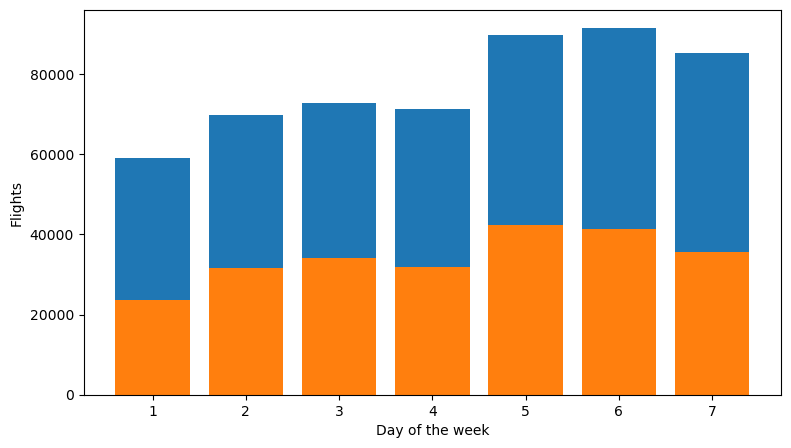

In [42]:
x_val = airlines_df['DayOfWeek'].unique()
y_valB = day_df['Delay'].sum()
y_valA = day_df['Delay'].count()

plt.figure(figsize=(9,5))
plt.bar(x_val, y_valA)
plt.bar(x_val, y_valB)
plt.xlabel('Day of the week')
plt.ylabel('Flights')
plt.show()

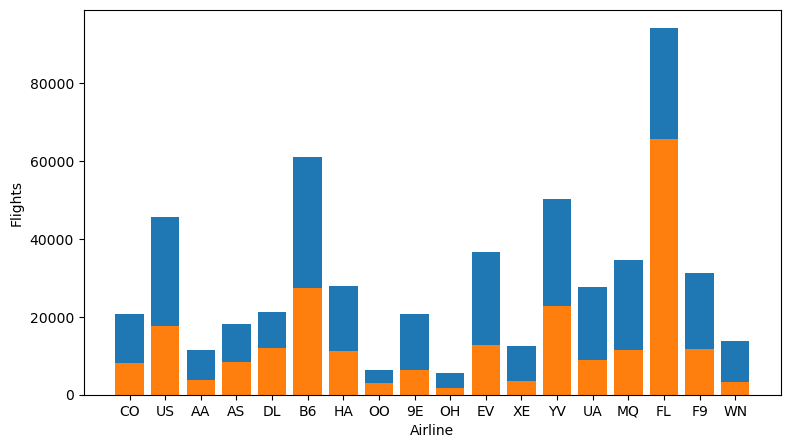

In [45]:
x_val3 = airlines_df['Airline'].unique()
y_val3B = airlines_df.groupby(['Airline'])['Delay'].sum()
y_val3A = airlines_df.groupby(['Airline'])['Delay'].count()

plt.figure(figsize=(9,5))
plt.bar(x_val3, y_val3A)
plt.bar(x_val3, y_val3B)
plt.xlabel('Airline')
plt.ylabel('Flights')
plt.show()

[Text(0, 0, '40'),
 Text(0, 0, '39'),
 Text(0, 0, '34'),
 Text(0, 0, '47'),
 Text(0, 0, '57'),
 Text(0, 0, '45'),
 Text(0, 0, '40'),
 Text(0, 0, '45'),
 Text(0, 0, '30'),
 Text(0, 0, '32'),
 Text(0, 0, '35'),
 Text(0, 0, '28'),
 Text(0, 0, '45'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '70'),
 Text(0, 0, '38'),
 Text(0, 0, '24')]

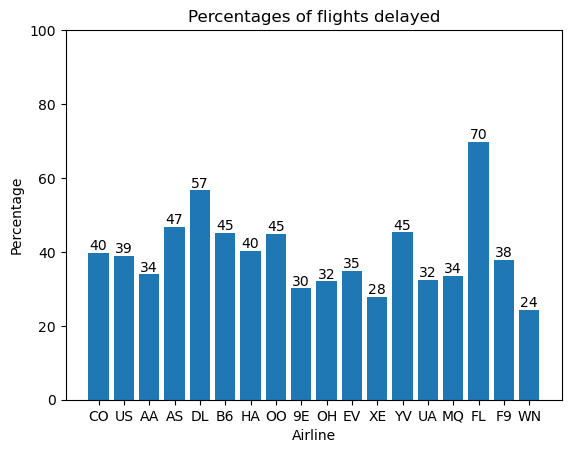

In [61]:
y_result3 = y_val3B.div(y_val3A).multiply(100)

fig, ax = plt.subplots()
bar_container = ax.bar(x_val3, y_result3)
ax.set(ylabel='Percentage', xlabel='Airline' , title='Percentages of flights delayed', ylim=(0, 100))
ax.bar_label(bar_container, fmt='{:,.0f}')

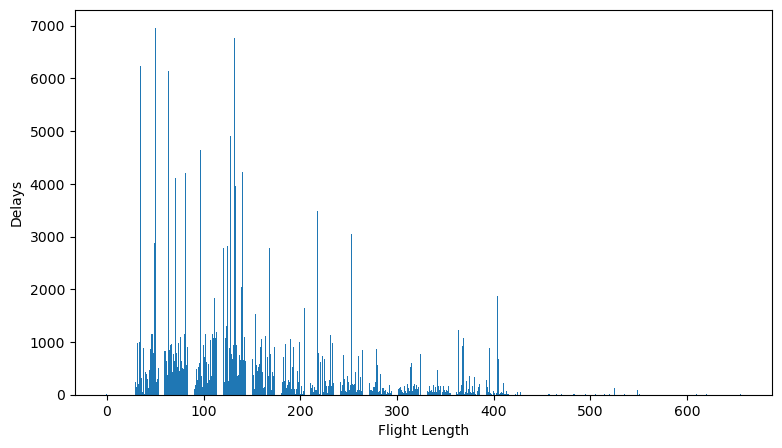

In [ ]:
|